# MTA Ridership Data: Post Pandemic Trends

In [7]:
import pandas as pd
import numpy as np
import plotnine as pn

df = pd.read_csv("mta-datasets/MTA_Daily_Ridership_Data__Beginning_2020_20241217.csv")

df['Date'] = pd.to_datetime(df['Date'])

# Filter for pandemic period: March 2020 onwards
pandemic_df = df[df['Date'] >= '2020-03-01']

# Add a 'Year' column for year-over-year analysis
pandemic_df['Year'] = pandemic_df['Date'].dt.year

# Add a rolling average for smoothing trends (7-day window)
pandemic_df['Subways_Rolling_Avg'] = pandemic_df['Subways: Total Estimated Ridership'].rolling(window=7).mean()
pandemic_df['Buses_Rolling_Avg'] = pandemic_df['Buses: Total Estimated Ridership'].rolling(window=7).mean()

# Calculate percentage change compared to pre-pandemic levels
pandemic_df['Subways_Recovery'] = pandemic_df['Subways: % of Comparable Pre-Pandemic Day'] * 100
pandemic_df['Buses_Recovery'] = pandemic_df['Buses: % of Comparable Pre-Pandemic Day'] * 100
pandemic_df

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Year,Subways_Rolling_Avg,Buses_Rolling_Avg,Subways_Recovery,Buses_Recovery
0,2020-03-01,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,19922,1.13,786960,0.98,1636,0.52,2020,NaN,NaN,97.0,99.0
1,2020-03-02,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,30338,1.02,874619,0.95,17140,1.07,2020,NaN,NaN,96.0,99.0
2,2020-03-03,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,32767,1.10,882175,0.96,17453,1.09,2020,NaN,NaN,98.0,99.0
3,2020-03-04,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,34297,1.15,905558,0.98,17136,1.07,2020,NaN,NaN,99.0,97.0
4,2020-03-05,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,33209,1.12,929298,1.01,17203,1.08,2020,NaN,NaN,99.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2024-12-11,4253832,0.80,1347779,0.67,253052,0.80,222538,0.80,39455,1.35,902382,1.02,7921,0.51,2024,3.772814e+06,1.212535e+06,80.0,67.0
1747,2024-12-12,4522646,0.85,1417653,0.71,269149,0.85,236210,0.85,41074,1.41,991418,1.12,8107,0.52,2024,3.796793e+06,1.214930e+06,85.0,71.0
1748,2024-12-13,4170618,0.78,1311247,0.65,248254,0.79,222096,0.80,39020,1.34,1011486,1.14,6928,0.44,2024,3.803885e+06,1.210976e+06,78.0,65.0
1749,2024-12-14,3107424,0.94,849038,0.67,161398,1.26,159083,1.01,25602,1.49,948115,1.07,3450,0.69,2024,3.816782e+06,1.206098e+06,94.0,67.0


/Users/zacannon-m3/Desktop/CSCI385/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


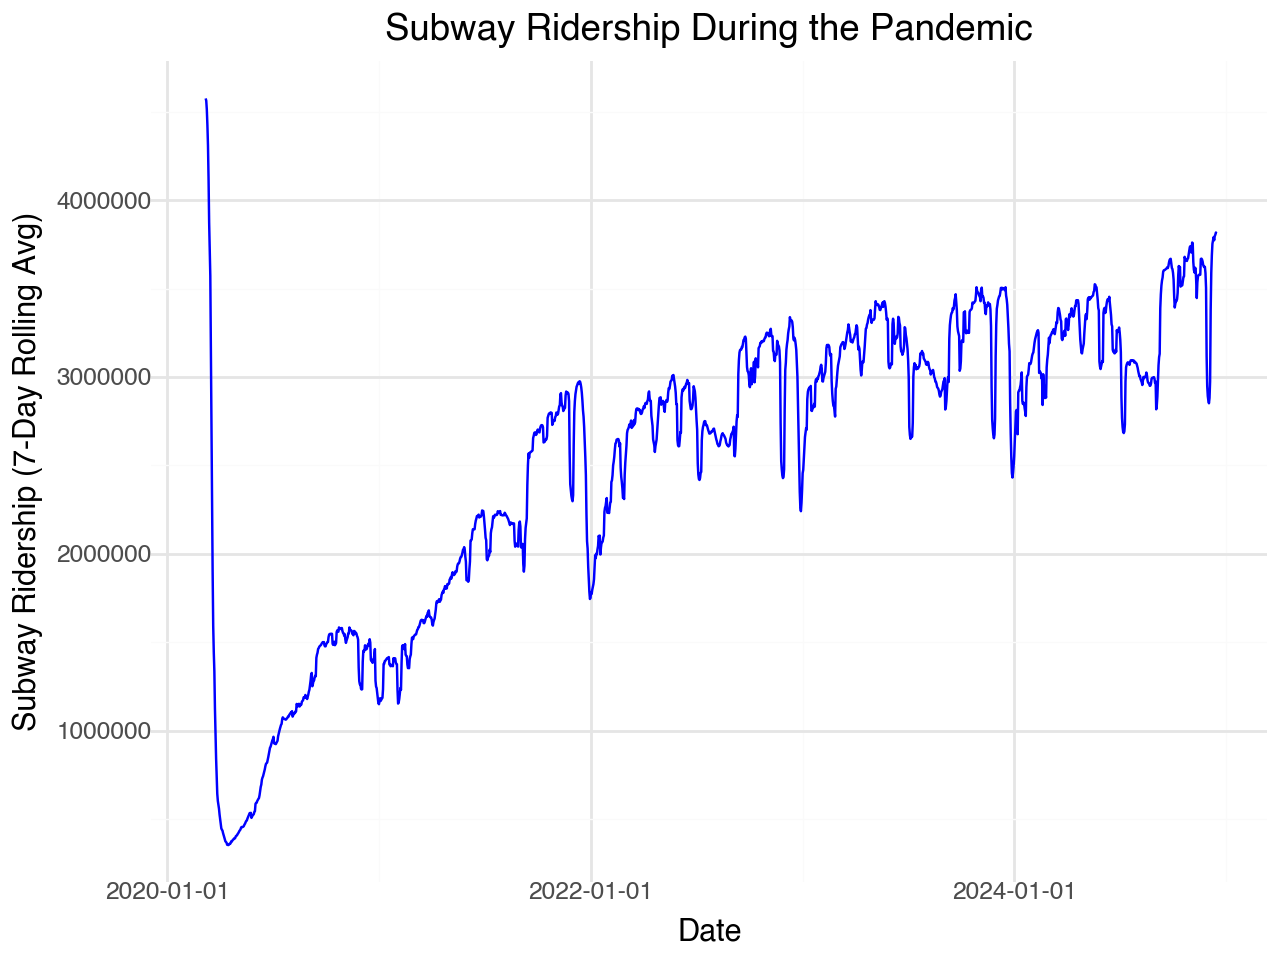

In [2]:
# Plot bus ridership recovery percentage
pn.ggplot(pandemic_df, pn.aes(x='Date', y='Subways_Rolling_Avg')) + \
    pn.geom_line(color='blue') + \
    pn.labs(
        title='Subway Ridership During the Pandemic',
        x='Date',
        y='Subway Ridership (7-Day Rolling Avg)'
    ) + \
pn.theme_minimal()

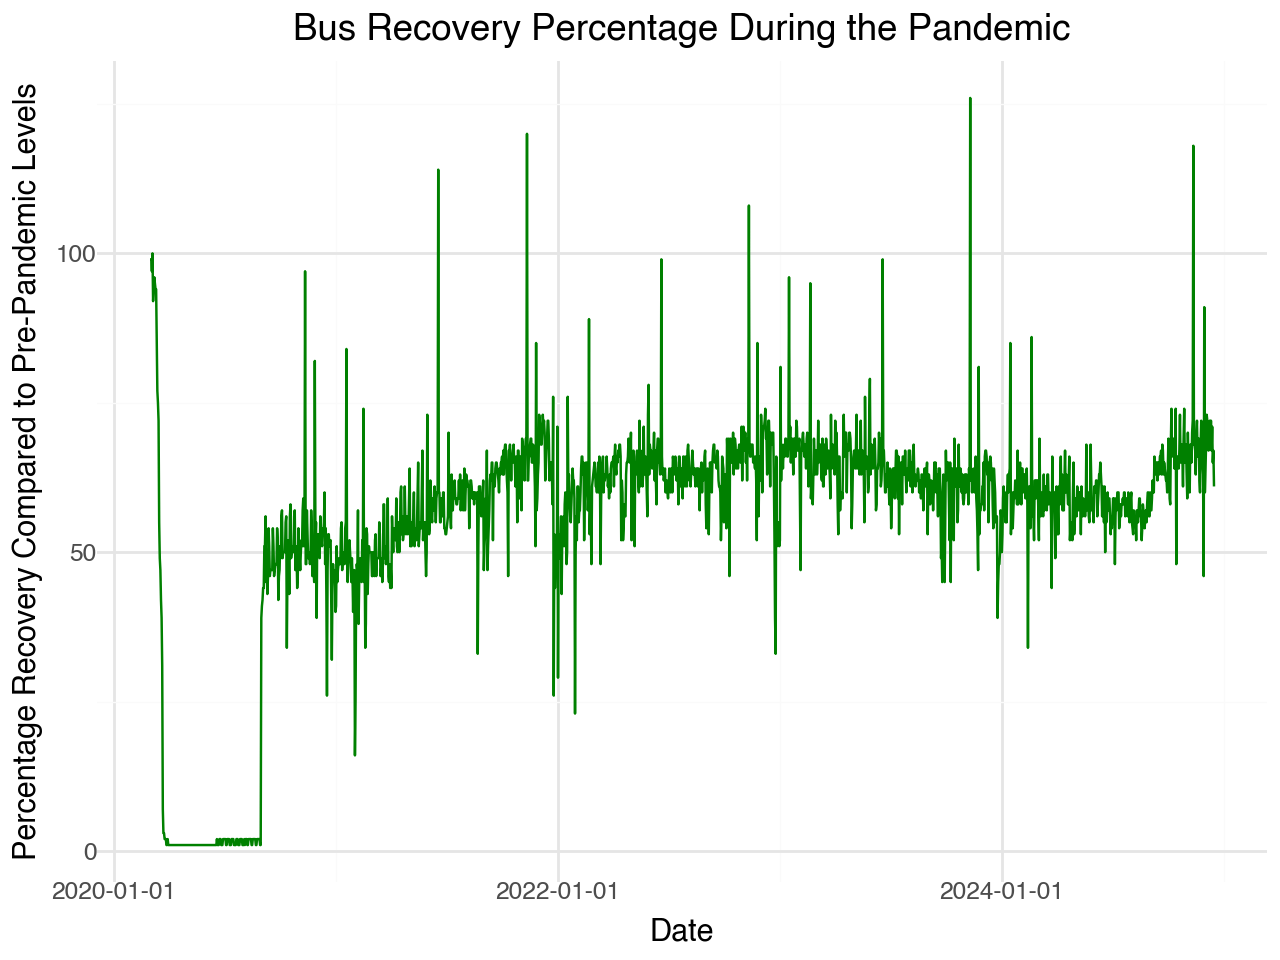

In [3]:
# Plot bus ridership recovery percentage
pn.ggplot(pandemic_df, pn.aes(x='Date', y='Buses_Recovery')) + \
    pn.geom_line(color='green') + \
    pn.labs(
        title='Bus Recovery Percentage During the Pandemic',
        x='Date',
        y='Percentage Recovery Compared to Pre-Pandemic Levels'
    ) + \
    pn.theme_minimal()

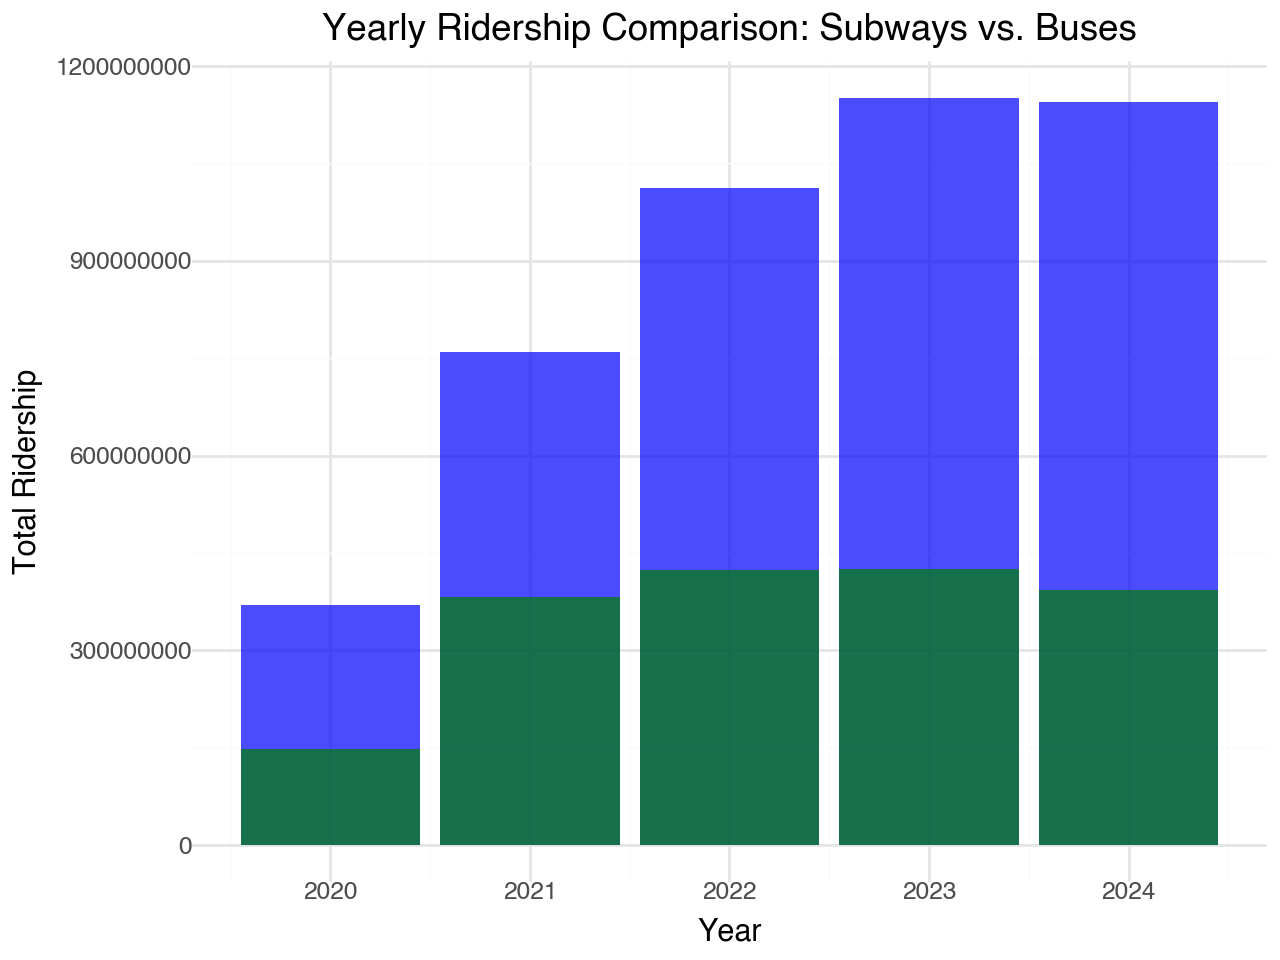

In [4]:
# Aggregate data for year-over-year comparisons
yearly_trends = (
    pandemic_df.groupby('Year')[['Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership']]
    .sum()
    .reset_index()
)

# Plot year-over-year ridership trends
pn.ggplot(yearly_trends, pn.aes(x='Year')) + \
    pn.geom_bar(pn.aes(y='Subways: Total Estimated Ridership'), stat='identity', fill='blue', alpha=0.7) + \
    pn.geom_bar(pn.aes(y='Buses: Total Estimated Ridership'), stat='identity', fill='green', alpha=0.7) + \
    pn.labs(
        title='Yearly Ridership Comparison: Subways vs. Buses',
        x='Year',
        y='Total Ridership'
    ) + \
    pn.theme_minimal()

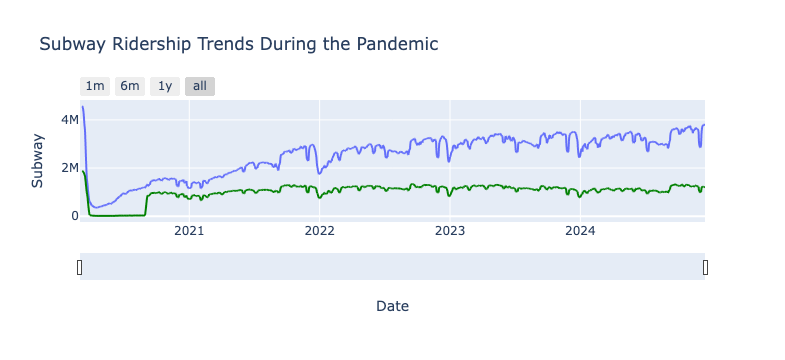

In [12]:
import plotly.express as px

fig = px.line(
    pandemic_df,
    x='Date',
    y='Subways_Rolling_Avg',
    title='Subway Ridership Trends During the Pandemic',
    labels={'Subways_Rolling_Avg': 'Subway'},
)
fig.add_trace(
    px.line(
        pandemic_df,
        x='Date',
        y='Buses_Rolling_Avg',
        labels={'Buses_Rolling_Avg': 'Bus'}
    ).data[0]  # This adds the data from the second line chart for buses
)
fig.data[1].update(line=dict(color='green'))


fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)
fig.show()
